In [1117]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [1118]:
df_countries = pd.read_csv("countries.csv")

In [1119]:
df_main = df_countries.copy()

In [1120]:
# features = [
#     "population",
#     "gdp",
#     "land_area",
#     "internet_pct",
#     "democracy_score",
#     "press",
#     "urban_population",
#     "rural_population",
#     "life_expectancy"
# ]

# df_features = df_countries[features].copy()

# df_features = df_features.fillna(df_features.median(numeric_only=True))

features = [
    "internet_pct",
    "fertility_rate",
    "life_expectancy",
    "health_expenditure_pct_gdp",
    "health_expenditure_capita",
    "inflation"
]

df_features = df_countries[features].copy()

df_features = df_features.fillna(df_features.median(numeric_only=True))

In [1121]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   internet_pct                194 non-null    float64
 1   fertility_rate              194 non-null    float64
 2   life_expectancy             194 non-null    float64
 3   health_expenditure_pct_gdp  194 non-null    float64
 4   health_expenditure_capita   194 non-null    float64
 5   inflation                   194 non-null    float64
dtypes: float64(6)
memory usage: 9.2 KB


In [1122]:
values = Normalizer().fit_transform(df_features.values) 
print(values)

[[0.17460224 0.0440586  0.58833365 0.15966711 0.77166411 0.02184777]
 [0.21568657 0.00377968 0.20665884 0.01810873 0.95398889 0.01828713]
 [0.2962153  0.01209221 0.31810602 0.02645797 0.89928571 0.03878181]
 ...
 [0.28297669 0.04019315 0.67782906 0.04504238 0.67041742 0.08583784]
 [0.24965787 0.05065709 0.71728941 0.06605977 0.63208131 0.12926731]
 [0.25771763 0.02584283 0.43675936 0.02535854 0.37514298 0.77509981]]


In [1123]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [1124]:
for i in range(3, 11):
    s, dbs, calinski = clustering_algorithm(i, values)
    print(i, s, dbs, calinski)

3 0.5358695453237923 0.7494164190444049 348.5484506799398
4 0.5617533984026003 0.6487230642035936 352.8642238504256
5 0.500609713427033 0.7759666231677788 367.62795210730985
6 0.4876559297012776 0.8086706382504687 390.123503527188
7 0.48930030200976793 0.7798573530410664 386.1729827612767
8 0.4895200928270512 0.8079001715400969 377.1131712263983
9 0.43814705369847645 0.8183474852637537 362.8503093790196
10 0.4448012434313428 0.8441826244424332 361.8267034147514


In [1125]:
random_data = np.random.rand(167,9)
s_random, dbs_random, calinski_random = clustering_algorithm(3, random_data)
s, dbs, calinski = clustering_algorithm(3, values)

print(s_random, dbs_random, calinski_random)
print(s, dbs, calinski)

0.09873609560586952 2.4256205054093622 18.40061610770911
0.5358695453237923 0.7494164190444049 348.5484506799398


In [1126]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(3, set1)
s2, dbs2, calinski2 = clustering_algorithm(3, set2)
s3, dbs3, calinski3 = clustering_algorithm(3, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.5809625495015467 0.7597938013583582 144.80591283635547
0.557100330750231 0.6196120027540309 203.70908469774236
0.6603284411643277 0.5049015013953524 121.12911324717972


In [1127]:
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

df_main['difficulty'] = labels

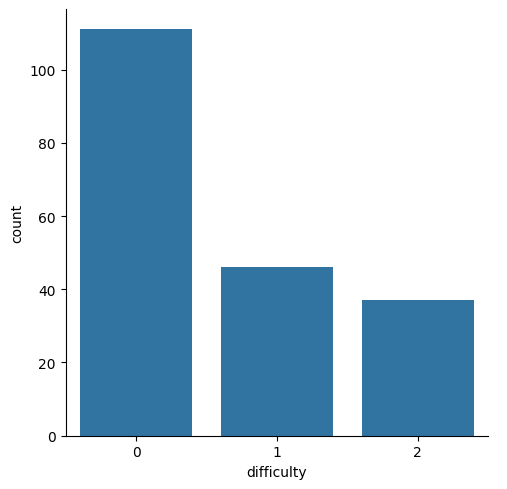

In [1128]:
sns.catplot(x='difficulty', kind='count', data=df_main)

In [1129]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.09125148 0.00261629 0.09111038 0.00936173 0.9862426  0.01418451]
 [0.34735041 0.04700016 0.69633128 0.05378309 0.51265481 0.18186976]
 [0.31910072 0.01740221 0.38196982 0.03539516 0.85008777 0.04088399]]


In [1130]:
max = len(centroids[0])
for i in range(max):
    print(df_features.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

internet_pct 
0.0131
fertility_rate 
0.0003
life_expectancy 
0.0611
health_expenditure_pct_gdp 
0.0003
health_expenditure_capita 
0.0396
inflation 
0.0054


In [1131]:
df_0 = df_main[df_main['difficulty'] == 0]
df_1 = df_main[df_main['difficulty'] == 1]
df_2 = df_main[df_main['difficulty'] == 2]

In [1132]:
df_0

,country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title,difficulty
1,Albania,Republic of Albania,Albanian lek,Tirana,Southern Europe,Europe,Albanian,41.00,20.0,11655.5,...,35.7143,1004807,1770827,2.62,5.98,Hybrid regime,33.7,Edi Rama,Prime Minister,0
3,Andorra,Principality of Andorra,Euro,Andorra la Vella,Southern Europe,Europe,Andorran,42.50,1.5,187.2,...,46.4286,9730,70094,3.17,0.00,Unknown,38.9,Xavier Espot Zamora,Head of Government,0
5,Antigua and Barbuda,Antigua and Barbuda,East Caribbean dollar,Saint John's,Caribbean,Americas,Antiguan,17.05,-61.8,90.0,...,11.1111,70935,22828,0.00,0.00,Unknown,31.1,Gaston Browne,Prime Minister,0
6,Argentina,Argentine Republic,Argentine peso,Buenos Aires,South America,Americas,Argentine,-34.00,-64.0,1083820.0,...,44.7471,3538352,42696478,2.76,7.02,Flawed democracy,27.6,Alberto Fernández,President,0
7,Armenia,Republic of Armenia,Armenian dram,Yerevan,Western Asia,Asia,Armenian,40.00,45.0,16760.0,...,35.5140,1012841,1767628,2.70,4.79,Hybrid regime,30.8,Nikol Pashinyan,Prime Minister,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,United Arab Emirates,United Arab Emirates,U.A.E. dirham,Abu Dhabi,Western Asia,Asia,Emirati,24.00,54.0,3898.0,...,50.0000,1176081,8265048,1.79,2.76,Authoritarian,29.3,Sheikh Khalifa bin Zayed Al Nahyan,President,0
183,United Kingdom,United Kingdom of Great Britain and Northern I...,Pound sterling,London,Northern Europe,Europe,British,54.00,-2.0,172593.0,...,34.5679,10448880,56522531,3.52,8.53,Full democracy,35.9,Rishi Sunak,Prime Minister,0
184,United States,United States of America,U.S. dollar,"Washington, D.C.",Northern America,Americas,American,38.00,-97.0,4058100.0,...,28.7037,56378923,276908634,3.04,7.96,Flawed democracy,33.9,Joe Biden,President,0
185,Uruguay,Oriental Republic of Uruguay,Uruguayan peso,Montevideo,South America,Americas,Uruguayan,-33.00,-56.0,140634.0,...,25.2525,147591,3275203,4.87,8.38,Full democracy,31.5,Luis Lacalle Pou,President,0


In [1133]:
df_1

,country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title,difficulty
4,Angola,People's Republic of Angola,Angolan kwanza,Luanda,Middle Africa,Africa,Angolan,-12.500000,18.500000,569525.0,...,33.63640,11359649,24229338,2.24,3.62,Authoritarian,12.4,João Lourenço,President,1
12,Bangladesh,People's Republic of Bangladesh,Bangladeshi taka,Dhaka,Southern Asia,Asia,Bangladeshi,24.000000,90.000000,99010.0,...,20.85710,103206552,67979820,1.54,5.57,Hybrid regime,22.7,Sheikh Hasina,Prime Minister,1
17,Benin,Republic of Benin,West African CFA franc,Porto-Novo,Western Africa,Africa,Beninese,9.500000,2.250000,39500.0,...,7.40741,6738656,6614208,2.46,5.74,Hybrid regime,13.6,Patrice Talon,President,1
25,Burkina Faso,Burkina Faso,West African CFA franc,Ouagadougou,Western Africa,Africa,Burkinabe,13.000000,-2.000000,121430.0,...,16.90140,15446047,7227715,3.19,4.75,Hybrid regime,12.9,Roch Marc Christian Kaboré,President,1
26,Burundi,Republic of Burundi,Burundi franc,Bujumbura,Eastern Africa,Africa,Burundian,-3.500000,30.000000,20330.0,...,38.21140,11031286,1858290,1.48,2.33,Authoritarian,11.9,Pierre Nkurunziza,President,1
29,Cameroon,Republic of Cameroon,Central African CFA franc,Yaoundé,Middle Africa,Africa,Cameroonian,6.000000,12.000000,97500.0,...,33.88890,11519492,16395044,1.81,3.28,Authoritarian,13.6,Paul Biya,President,1
31,Central African Republic,Central African Republic,Central African CFA franc,Bangui,Middle Africa,Africa,Central African,7.000000,21.000000,50800.0,...,12.85710,3173417,2405727,1.65,1.52,Authoritarian,10.8,Faustin-Archange Touadéra,President,1
32,Chad,Republic of Chad,Central African CFA franc,N'Djamena,Middle Africa,Africa,Chadian,15.000000,19.000000,502380.0,...,25.88830,13458554,4264761,2.13,1.61,Authoritarian,11.2,Idriss Déby,President,1
45,Dem. Rep. Congo,Democratic Republic of the Congo,Congolese franc,Kinshasa,Middle Africa,Africa,Congolese,0.000000,25.000000,335720.0,...,12.80000,52636799,46373413,1.51,1.49,Authoritarian,11.7,Félix Tshisekedi,President,1
47,Djibouti,Republic of Djibouti,Djibouti franc,Djibouti,Eastern Africa,Africa,Djibouti,11.500000,43.000000,17020.0,...,26.15380,242328,878521,1.10,2.87,Authoritarian,20.0,Ismaïl Omar Guelleh,President,1


In [1134]:
df_2

,country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title,difficulty
0,Afghanistan,Islamic State of Afghanistan,Afghan afghani,Kabul,Southern Asia,Asia,Afghan,33.000000,65.000000,383560.0,...,27.01610,30181937,10946834,2.14,2.97,Authoritarian,12.9,Ashraf Ghani,President,2
2,Algeria,People's Democratic Republic of Algeria,Algerian dinar,Algiers,Northern Africa,Africa,Algerian,28.000000,3.000000,413588.0,...,8.10811,11328186,33575039,1.71,3.50,Authoritarian,24.0,Abdelmadjid Tebboune,President,2
10,Azerbaijan,Republic of Azerbaijan,New Azeri manat,Baku,Western Asia,Asia,Azerbaijani,40.500000,47.500000,47801.0,...,18.33330,4357959,5817057,1.32,2.65,Authoritarian,27.9,Ilham Aliyev,President,2
18,Bhutan,Kingdom of Bhutan,Bhutanese ngultrum,Thimphu,Southern Asia,Asia,Bhutanese,27.500000,90.500000,5130.0,...,17.39130,440632,341823,2.62,5.30,Hybrid regime,24.8,Lotay Tshering,Prime Minister,2
19,Bolivia,Plurinational State of Bolivia,Bolivian Boliviano,Sucre,South America,Americas,Bolivian,-17.000000,-65.000000,377870.0,...,46.15380,3565773,8658337,2.21,5.70,Hybrid regime,20.1,Jeanine Áñez,President,2
27,Cabo Verde,Republic of Cabo Verde,Cabo Verde escudo,Praia,Western Africa,Africa,Cape Verdian,16.000000,-24.000000,790.0,...,38.88890,192507,400642,3.95,7.88,Flawed democracy,22.9,NaN,NaN,2
28,Cambodia,Kingdom of Cambodia,Cambodian riel,Phnom Penh,South-Eastern Asia,Asia,Cambodian,13.000000,105.000000,57890.0,...,20.80000,12556766,4211076,1.70,3.59,Authoritarian,22.7,Hun Sen,Prime Minister,2
36,Comoros,Union of the Comoros,Comorian franc,Moroni,Eastern Africa,Africa,Comoran,-12.166667,44.250000,1310.0,...,16.66670,586880,249894,2.80,3.71,Authoritarian,16.3,Azali Assoumani,President,2
37,Congo,Republic of Congo,Central African CFA franc,Brazzaville,Middle Africa,Africa,Congolese,-1.000000,15.000000,106280.0,...,14.56950,1866593,4103831,2.17,3.31,Authoritarian,14.3,Denis Sassou Nguesso,President,2
39,Cote d'Ivoire,Republic of Côte d'Ivoire,West African CFA franc,Yamoussoukro,Western Africa,Africa,Ivorian,8.000000,-5.000000,212000.0,...,14.17320,13330919,14829623,2.65,4.15,Hybrid regime,13.8,Alassane Ouattara,President,2


<function matplotlib.pyplot.show(close=None, block=None)>

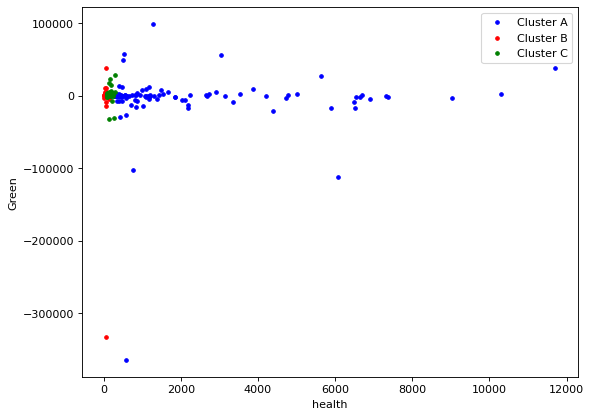

In [1135]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_0['health_expenditure_capita'], df_0['greenhouse_other_emissions'], c='blue', s=10, label='Cluster A')
plt.scatter(df_1['health_expenditure_capita'], df_1['greenhouse_other_emissions'], c='red', s=10, label='Cluster B')
plt.scatter(df_2['health_expenditure_capita'], df_2['greenhouse_other_emissions'], c='green', s=10, label='Cluster C')

plt.xlabel('health')
plt.ylabel('Green')
plt.legend(),
plt.show

In [1136]:
clusters_name = {0: 'easy', 1: 'hard', 2: 'medium'}
df_main['difficulty'] = df_main['difficulty'].map(clusters_name)

fig = px.choropleth(df_main,
                    locationmode='country names',
                    locations='country',
                    color='difficulty',
                    title='Coutries by labels'
                   )
fig.show()

In [1137]:
df_main

,country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title,difficulty
0,Afghanistan,Islamic State of Afghanistan,Afghan afghani,Kabul,Southern Asia,Asia,Afghan,33.000000,65.000000,383560.0,...,27.01610,30181937,10946834,2.14,2.97,Authoritarian,12.9,Ashraf Ghani,President,medium
1,Albania,Republic of Albania,Albanian lek,Tirana,Southern Europe,Europe,Albanian,41.000000,20.000000,11655.5,...,35.71430,1004807,1770827,2.62,5.98,Hybrid regime,33.7,Edi Rama,Prime Minister,easy
2,Algeria,People's Democratic Republic of Algeria,Algerian dinar,Algiers,Northern Africa,Africa,Algerian,28.000000,3.000000,413588.0,...,8.10811,11328186,33575039,1.71,3.50,Authoritarian,24.0,Abdelmadjid Tebboune,President,medium
3,Andorra,Principality of Andorra,Euro,Andorra la Vella,Southern Europe,Europe,Andorran,42.500000,1.500000,187.2,...,46.42860,9730,70094,3.17,0.00,Unknown,38.9,Xavier Espot Zamora,Head of Government,easy
4,Angola,People's Republic of Angola,Angolan kwanza,Luanda,Middle Africa,Africa,Angolan,-12.500000,18.500000,569525.0,...,33.63640,11359649,24229338,2.24,3.62,Authoritarian,12.4,João Lourenço,President,hard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,Socialist Republic of Vietnam,Vietnamese dong,Hanoi,South-Eastern Asia,Asia,Vietnamese,16.166667,107.833333,123600.0,...,30.26050,60123739,38063117,1.04,3.08,Authoritarian,28.4,Nguyễn Phú Trọng,General Secretary of the Communist Party,medium
190,West Bank and Gaza,West Bank and Gaza,Israeli new shekel,Ramallah,Western Asia,Asia,Palestinian,31.900000,35.200000,4449.0,...,NaN,1145354,3898258,1.75,4.39,Hybrid regime,15.4,NaN,NaN,easy
191,Yemen,Republic of Yemen,Yemeni rial,Sana'a,Western Asia,Asia,Yemeni,15.000000,48.000000,234520.0,...,0.00000,20491585,13205029,1.27,1.95,Authoritarian,14.8,Abdrabbuh Mansur Hadi,President,hard
192,Zambia,Republic of Zambia,New Zambian kwacha,Lusaka,Eastern Africa,Africa,Zambian,-15.000000,30.000000,238360.0,...,15.06020,10857387,9160288,2.15,5.61,Hybrid regime,13.2,Edgar Lungu,President,hard


In [1138]:
df_main.to_csv("countries_updated.csv", index=False)

In [1139]:
print(df_main.dtypes)

country              object
country_long         object
currency             object
capital_city         object
region               object
                     ...   
democracy_type       object
median_age          float64
political_leader     object
title                object
difficulty           object
Length: 65, dtype: object


In [1140]:
df_main

,country,country_long,currency,capital_city,region,continent,demonym,latitude,longitude,agricultural_land,...,women_parliament_seats_pct,rural_population,urban_population,press,democracy_score,democracy_type,median_age,political_leader,title,difficulty
0,Afghanistan,Islamic State of Afghanistan,Afghan afghani,Kabul,Southern Asia,Asia,Afghan,33.000000,65.000000,383560.0,...,27.01610,30181937,10946834,2.14,2.97,Authoritarian,12.9,Ashraf Ghani,President,medium
1,Albania,Republic of Albania,Albanian lek,Tirana,Southern Europe,Europe,Albanian,41.000000,20.000000,11655.5,...,35.71430,1004807,1770827,2.62,5.98,Hybrid regime,33.7,Edi Rama,Prime Minister,easy
2,Algeria,People's Democratic Republic of Algeria,Algerian dinar,Algiers,Northern Africa,Africa,Algerian,28.000000,3.000000,413588.0,...,8.10811,11328186,33575039,1.71,3.50,Authoritarian,24.0,Abdelmadjid Tebboune,President,medium
3,Andorra,Principality of Andorra,Euro,Andorra la Vella,Southern Europe,Europe,Andorran,42.500000,1.500000,187.2,...,46.42860,9730,70094,3.17,0.00,Unknown,38.9,Xavier Espot Zamora,Head of Government,easy
4,Angola,People's Republic of Angola,Angolan kwanza,Luanda,Middle Africa,Africa,Angolan,-12.500000,18.500000,569525.0,...,33.63640,11359649,24229338,2.24,3.62,Authoritarian,12.4,João Lourenço,President,hard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,Socialist Republic of Vietnam,Vietnamese dong,Hanoi,South-Eastern Asia,Asia,Vietnamese,16.166667,107.833333,123600.0,...,30.26050,60123739,38063117,1.04,3.08,Authoritarian,28.4,Nguyễn Phú Trọng,General Secretary of the Communist Party,medium
190,West Bank and Gaza,West Bank and Gaza,Israeli new shekel,Ramallah,Western Asia,Asia,Palestinian,31.900000,35.200000,4449.0,...,NaN,1145354,3898258,1.75,4.39,Hybrid regime,15.4,NaN,NaN,easy
191,Yemen,Republic of Yemen,Yemeni rial,Sana'a,Western Asia,Asia,Yemeni,15.000000,48.000000,234520.0,...,0.00000,20491585,13205029,1.27,1.95,Authoritarian,14.8,Abdrabbuh Mansur Hadi,President,hard
192,Zambia,Republic of Zambia,New Zambian kwacha,Lusaka,Eastern Africa,Africa,Zambian,-15.000000,30.000000,238360.0,...,15.06020,10857387,9160288,2.15,5.61,Hybrid regime,13.2,Edgar Lungu,President,hard
